# Background Introduction: 
Real-Time-Bidding(RTB) mechanism is widely used to buy and sell ads in display and mobile advertising area recent years.
RTB essentially facilitates buying an individual ad impression in real time, automatically triggered by a user’s visit.
Although  other  types  of  auctions,  such  as  the  first  price auction, are also popular, RTB exchanges typically employ
the  second  price  auction  model.   In  this  type  of  auction,the bidder winning the auction pays the price of the second
highest offer.  A summary of the process is provided in Figure1.  In this assignment you will be training your own bidding
strategy models on a given impression dataset, as described
in detail next.

<img src="figure1.png">

## Purpose: understanding the data and perform proper primarily data analytics
### we have 3 csv files as dataset: test.csv ,  train.csv  and  validation.csv



In [18]:
# import libraries
import numpy as np
import pandas as pd
import random
import csv
import scipy.stats as stats
import seaborn as sns
from collections import Counter
from collections import defaultdict
import math
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from random import randint

import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

# initialize the plotting sizes
# set size
plt.rc('figure', figsize=(10, 5))
# subplots size
fizsize_with_subplots = (10, 10)
# histogram size
bin_size = 10

In [19]:
train_df = pd.read_csv('train.csv')
val_df = pd.read_csv('validation.csv')
test_df = pd.read_csv('test.csv')

In [20]:
# have a quick look at the train data table
print(train_df.shape)
train_df.head(2)

(2430981, 25)


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,...,250,FourthView,Na,0,10722,294,23,null,2821,null


In [21]:
train_df.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [22]:
# have a quick look at the test data table
print(test_df.shape)
test_df.head(2)

(303375, 22)


,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,...,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,keypage,advertiser,usertag
0,0,12,366c563de7d90feb9d4dab53e795a93fb3157387,75045dd2f2136c93fe55fe6c446ec1527ed8f0bb,windows_chrome,27.197.36.*,146,159,3,DDTSQuf0MTTNaqKIvMpENpn,...,Astro_F_Rectangle,300,250,0,0,10,00fccc64a1ee2809348509b7ac2a97a5,b2e35064f3549d447edbbdfb1f707c8c,3427,"10024,10077,10075,10063,10031,10102,10006,1304..."
1,3,14,29167d4caa719788b5a342dbaa25151d53121f80,11279eb1f8f7a88f877db911673522b6ff202aa7,android_safari,124.126.227.*,1,1,null,d63d96468f66986d5a8eb5225ad0b6f0,...,2745306850,320,50,FirstView,Na,5,11908,null,2997,null


In [23]:
test_df.columns

Index(['weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP', 'region',
       'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid', 'slotwidth',
       'slotheight', 'slotvisibility', 'slotformat', 'slotprice', 'creative',
       'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [24]:
# have a quick look at the validation data table
print(val_df.shape)
val_df.head(2)

(303925, 25)


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"


In [25]:
# statistical properties of the train data
pd.options.display.float_format = '{:20,.3f}'.format
train_df.describe()

,click,weekday,hour,region,city,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,"2,430,981.000","2,430,981.000","2,430,981.000","2,430,981.000","2,430,981.000","2,430,981.000","2,430,981.000","2,430,981.000","2,430,981.000","2,430,981.000","2,430,981.000"
mean,0.001,2.889,13.489,149.383,154.330,577.422,188.572,26.718,272.962,78.151,"2,840.736"
std,0.027,2.055,6.567,102.063,103.309,321.674,131.495,37.044,28.912,59.846,784.199
min,0.000,0.000,0.000,0.000,0.000,120.000,50.000,0.000,227.000,0.000,"1,458.000"
25%,0.000,1.000,10.000,79.000,79.000,300.000,90.000,0.000,241.000,33.000,"2,259.000"
50%,0.000,3.000,14.000,146.000,152.000,336.000,90.000,5.000,294.000,68.000,"3,358.000"
75%,0.000,5.000,19.000,216.000,222.000,960.000,250.000,50.000,300.000,99.000,"3,427.000"
max,1.000,6.000,23.000,395.000,399.000,"1,000.000",600.000,300.000,300.000,300.000,"3,476.000"


In [32]:
# have a look at the trpes of columns in an entry
train_df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430981 entries, 0 to 2430980
Data columns (total 25 columns):
click             2430981 non-null int64
weekday           2430981 non-null int64
hour              2430981 non-null int64
bidid             2430981 non-null object
userid            2430981 non-null object
useragent         2430981 non-null object
IP                2430981 non-null object
region            2430981 non-null int64
city              2430981 non-null int64
adexchange        2430981 non-null object
domain            2430981 non-null object
url               2430981 non-null object
urlid             2430981 non-null object
slotid            2430981 non-null object
slotwidth         2430981 non-null int64
slotheight        2430981 non-null int64
slotvisibility    2430981 non-null object
slotformat        2430981 non-null object
slotprice         2430981 non-null int64
creative          2430981 non-null object
bidprice          2430981 non-null int64
payprice      

In [33]:
# see what is actually stored in each entry
train_df.loc[1]

click                                                    0
weekday                                                  1
hour                                                    20
bidid             4f51205475678f5a124bc76b2c54163bf8eaa7eb
userid            3a1fe01360ff8100e7d006b83b77a3e4c01d928c
useragent                                   windows_chrome
IP                                             171.36.92.*
region                                                 238
city                                                   239
adexchange                                               1
domain                    20fc675468712705dbf5d3eda94126da
url                       3ddf173a94bd23c326683b6373c75dd4
urlid                                                 null
slotid                          mm_10982364_973726_8930541
slotwidth                                              300
slotheight                                             250
slotvisibility                                  FourthVi

In [34]:
# 9 advertisers in total
train_df.advertiser.value_counts()

1458    492353
3386    455041
3427    402806
3476    310835
3358    264956
2821    211366
2259    133673
2261    110122
2997     49829
Name: advertiser, dtype: int64

In [35]:
# have a look at not win numbers of each advertiser
list_advert = list(Counter(train_df.advertiser))

def no_of__failed_impression(data):
    data = data.copy()
    data["no_of_failed_impression"] = data.payprice==0
    data["no_of_failed_impression"].astype(int)
    return sum(data["no_of_failed_impression"])
for i in list_advert:
    print('Advertiser',i,': ', no_of__failed_impression(train_df[train_df.advertiser == i]))
print('Total: ',no_of__failed_impression(train_df))

Advertiser 3427 :  1
Advertiser 2821 :  0
Advertiser 1458 :  0
Advertiser 2259 :  0
Advertiser 3386 :  1
Advertiser 3358 :  0
Advertiser 3476 :  22
Advertiser 2261 :  463
Advertiser 2997 :  0
Total:  487


In [36]:
# have a look at not win numbers of each advertiser
list_advert2 = list(Counter(val_df.advertiser))

def no_of__failed_impression(data):
    data = data.copy()
    data["no_of_failed_impression"] = data.payprice==0
    data["no_of_failed_impression"].astype(int)
    return sum(data["no_of_failed_impression"])
for i in list_advert2:
    print('Advertiser',i,': ', no_of__failed_impression(val_df[train_df.advertiser == i]))
print('Total: ',no_of__failed_impression(val_df))

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


Advertiser 1458 :  16
Advertiser 3476 :  7
Advertiser 3358 :  10
Advertiser 3427 :  13
Advertiser 3386 :  15
Advertiser 2261 :  4
Advertiser 2821 :  5
Advertiser 2259 :  10
Advertiser 2997 :  2
Total:  82


In [50]:
# have a look at how many bid are completed at bidprice which is bidprice = payprice
special  = []
special = train_df[train_df.bidprice==train_df.payprice]
print(special.shape)
# print(special[special.click==1])
print('clicks when equal:',sum(special.click))

(2753, 25)
clicks when equal: 8


In [51]:
# have a look at how many bid are completed at bidprice which is bidprice < payprice
special1  = []
special2 = train_df[train_df.bidprice<train_df.payprice]
print(special2.shape)
print('clicks when equal:',sum(special2.click))

(0, 25)
clicks when equal: 0


In [52]:
# have a look at how many bid are completed at bidprice which is bidprice = payprice
special3  = []
special3 = val_df[val_df.bidprice==val_df.payprice]
print(special3.shape)
print('clicks when equal:',sum(special3.click))

(336, 25)
clicks when equal: 1


In [41]:
# now get rid of all the cases that payprice equals zero, which is the failed bid 
train_df1 = train_df[train_df.payprice>0]
# now get rid of all the bidprice = payprice cases, not win cases
train_df2 = train_df1[train_df1.bidprice>train_df1.payprice]

val_df1 = val_df[val_df.payprice>0]
# now get rid of all the bidprice = payprice cases, not win cases
val_df2 = val_df1[val_df1.bidprice>val_df1.payprice]

train_df2.describe()

,click,weekday,hour,region,city,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,"2,427,741.000","2,427,741.000","2,427,741.000","2,427,741.000","2,427,741.000","2,427,741.000","2,427,741.000","2,427,741.000","2,427,741.000","2,427,741.000","2,427,741.000"
mean,0.001,2.888,13.491,149.394,154.341,577.480,188.573,26.746,272.959,77.947,"2,840.922"
std,0.027,2.055,6.566,102.062,103.308,321.713,131.514,37.054,28.907,59.508,784.133
min,0.000,0.000,0.000,0.000,0.000,120.000,50.000,0.000,227.000,1.000,"1,458.000"
25%,0.000,1.000,10.000,79.000,79.000,300.000,90.000,0.000,241.000,33.000,"2,259.000"
50%,0.000,3.000,14.000,146.000,152.000,336.000,90.000,5.000,294.000,68.000,"3,358.000"
75%,0.000,5.000,19.000,216.000,222.000,960.000,250.000,50.000,300.000,99.000,"3,427.000"
max,1.000,6.000,23.000,395.000,399.000,"1,000.000",600.000,300.000,300.000,299.000,"3,476.000"


In [43]:
# original data train: (2430981, 25), val: (303925, 25)
print(train_df2.shape)
print(val_df2.shape)

(2427741, 25)
(303507, 25)


In [49]:
# difference because when bid = pay, some auctions win
print("the total number of clicks in train: ", sum(train_df.click))
print("the total number of clicks in validation: ", sum(val_df.click))

print("the total number of clicks in train2: ", sum(train_df2.click))
print("the total number of clicks in validation2: ", sum(val_df2.click))

the total number of clicks in train:  1793
the total number of clicks in validation:  202
the total number of clicks in train2:  1785
the total number of clicks in validation2:  201


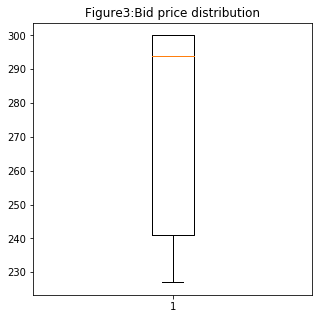

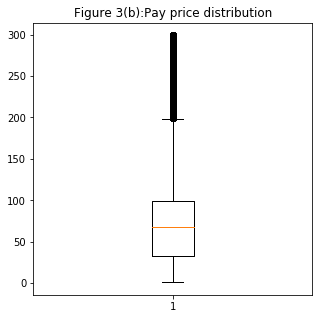

In [56]:
# have a look at bidprice and pay price distribution
plt.figure(figsize=(5,5))
plt.boxplot(train_df2.bidprice)
plt.title('Figure3:Bid price distribution')

plt.figure(figsize=(5,5))
plt.boxplot(train_df2.payprice)
plt.title('Figure 3(b):Pay price distribution')


In [16]:
# have a look at which useragent is used
train_df2.useragent.value_counts()

windows_ie          1459885
windows_chrome       793603
android_safari        61495
mac_safari            37141
windows_firefox       22251
windows_theworld      14009
windows_other         11120
mac_other              7731
windows_maxthon        7403
windows_opera          2192
mac_chrome             1934
android_other          1817
other_other            1647
windows_safari         1612
linux_chrome            982
mac_firefox             744
android_chrome          480
android_opera           402
linux_firefox           355
ios_safari              350
linux_safari            131
other_opera             103
linux_other              52
other_safari             47
ios_other                39
android_maxthon          37
mac_maxthon              31
linux_opera              23
mac_opera                23
android_firefox          20
linux_ie                 17
other_chrome             15
android_sogou            14
other_ie                 14
mac_sogou                12
windows_sogou       

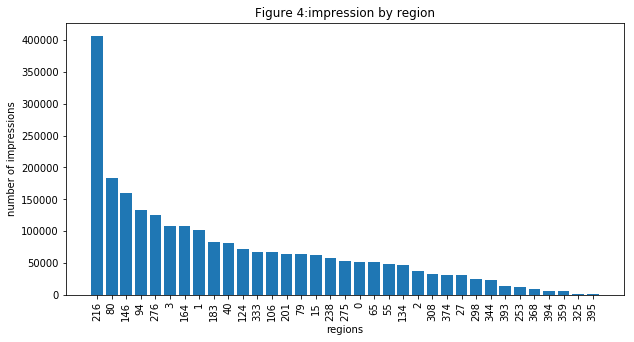

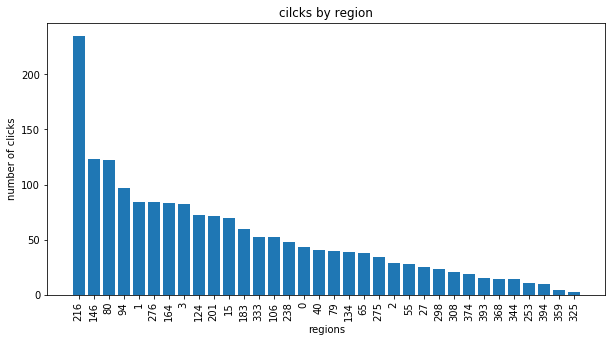

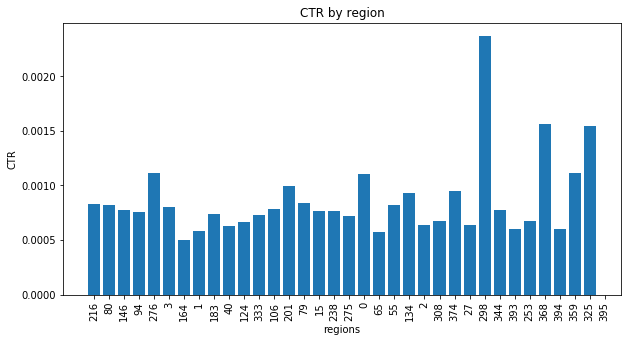

In [57]:
# have a look at which region the impression is more
x_r =train_df2.region.value_counts()
plt.bar(range(0,len(x_r)),train_df2.region.value_counts(),tick_label = train_df2.region.value_counts().index)
plt.xticks(rotation=90)
plt.title("Figure 4:impression by region")
plt.xlabel("regions")
plt.ylabel("number of impressions")
plt.show()

x_c =train_df2[train_df2.click==1].region.value_counts()
plt.bar(range(0,len(x_c)),x_c,tick_label = x_c.index)
plt.xticks(rotation=90)
plt.title("cilcks by region")
plt.xlabel("regions")
plt.ylabel("number of clicks")
plt.show()

region_click = train_df2[train_df2.click==1].region.value_counts()
region_impression = train_df2.region.value_counts()
x_r_ctr =region_click/region_impression
plt.bar(range(0,len(x_r_ctr)),x_r_ctr,tick_label = train_df2.region.value_counts().index)
plt.xticks(rotation=90)
plt.title("CTR by region")
plt.xlabel("regions")
plt.ylabel("CTR")
plt.show()


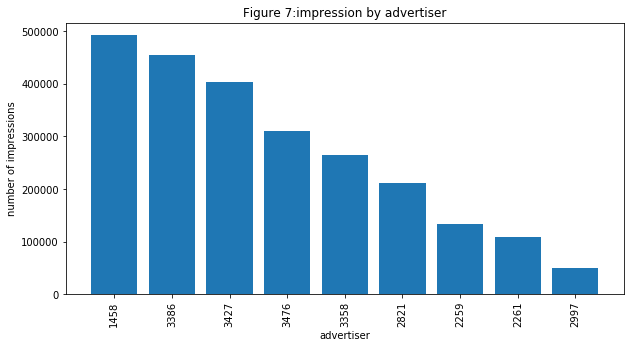

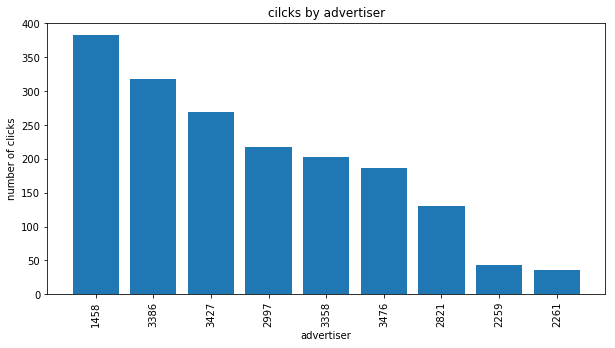

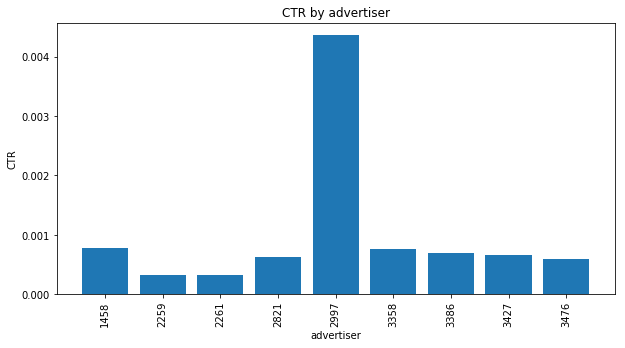

In [64]:
# have a look at advertiser
x_a =train_df2.advertiser.value_counts()
plt.bar(range(0,len(x_a)),x_a,tick_label = x_a.index)
plt.xticks(rotation=90)
plt.title("Figure 7:impression by advertiser")
plt.xlabel("advertiser")
plt.ylabel("number of impressions")
plt.show()

x_c =train_df2[train_df2.click==1].advertiser.value_counts()
plt.bar(range(0,len(x_c)),x_c,tick_label = x_c.index)
plt.xticks(rotation=90)
plt.title("cilcks by advertiser")
plt.xlabel("advertiser")
plt.ylabel("number of clicks")
plt.show()

a_click = train_df2[train_df2.click==1].advertiser.value_counts()
a_impression = train_df2.advertiser.value_counts()
x_a_ctr =a_click/a_impression
plt.bar(range(0,len(x_a_ctr)),x_a_ctr,tick_label = x_a_ctr.index)
plt.xticks(rotation=90)
plt.title("CTR by advertiser")
plt.xlabel("advertiser")
plt.ylabel("CTR")
plt.show()


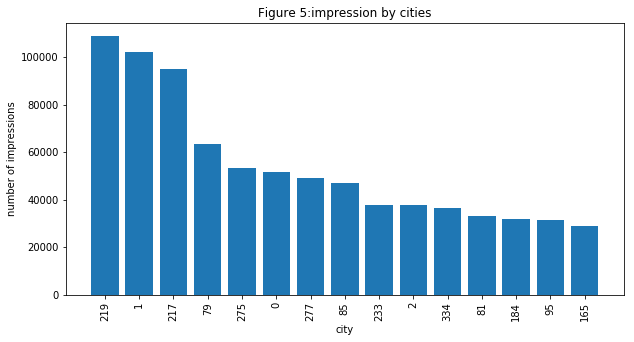

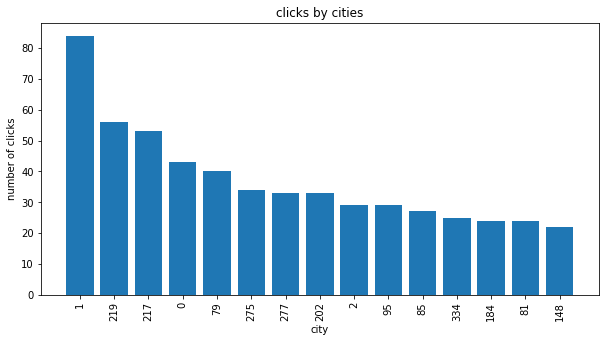

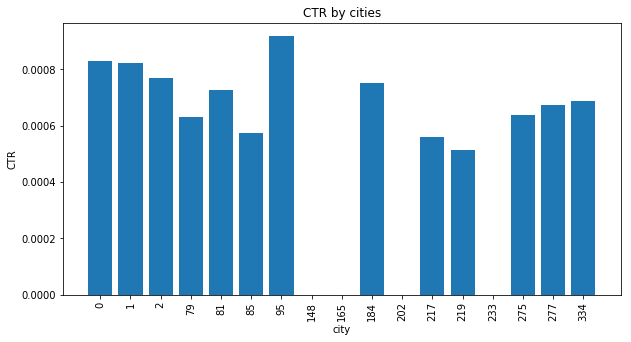

In [61]:
# have a look at the impression of cities
x_c =train_df2.city.value_counts()[0:15]
plt.bar(range(0,len(x_c)),x_c,tick_label = x_c.index)
plt.xticks(rotation=90)
plt.title("Figure 5:impression by cities")
plt.xlabel("city")
plt.ylabel("number of impressions")
plt.show()

x_click =train_df2[train_df2.click==1].city.value_counts()[0:15]
plt.bar(range(0,len(x_click)),x_click,tick_label = x_click.index)
plt.xticks(rotation=90)
plt.title("clicks by cities")
plt.xlabel("city")
plt.ylabel("number of clicks")
plt.show()


city_click = train_df2[train_df2.click==1].city.value_counts()[0:15]
city_impression = train_df2.city.value_counts()[0:15]
x_c_ctr =city_click/city_impression
plt.bar(range(0,len(x_c_ctr)),x_c_ctr,tick_label = x_c_ctr.index)
plt.xticks(rotation=90)
plt.title("CTR by cities")
plt.xlabel("city")
plt.ylabel("CTR")
plt.show()


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


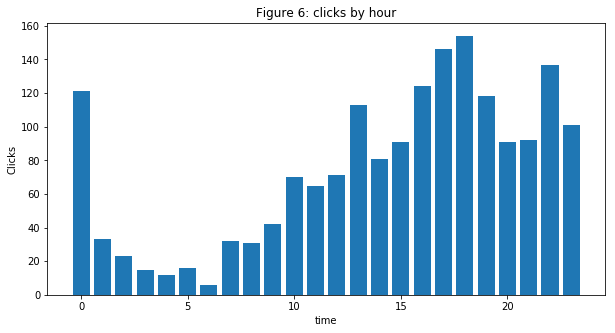

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


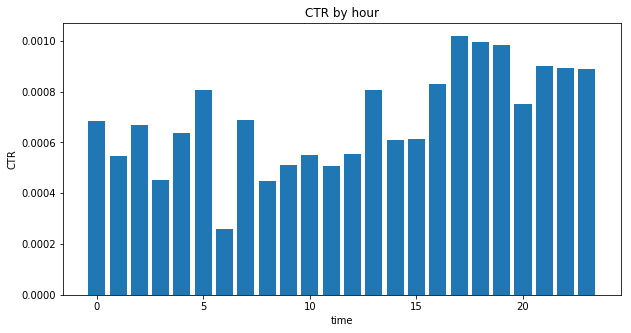

121 176569 in hour:  0  The CTR is :  0.0006852845063402976
16 19850 in hour:  5  The CTR is :  0.0008060453400503779
32 46452 in hour:  7  The CTR is :  0.0006888831481959872
113 140247 in hour:  13  The CTR is :  0.0008057213345026988
124 149626 in hour:  16  The CTR is :  0.0008287329742157111
146 143274 in hour:  17  The CTR is :  0.0010190264807292322
154 154935 in hour:  18  The CTR is :  0.0009939652112176073
118 120204 in hour:  19  The CTR is :  0.0009816645036770824
91 121097 in hour:  20  The CTR is :  0.0007514637026515933
92 101985 in hour:  21  The CTR is :  0.0009020934451144776
137 153634 in hour:  22  The CTR is :  0.0008917296952497494
101 113632 in hour:  23  The CTR is :  0.0008888341312306392


In [62]:

hour_click = train_df2[train_df.click==1].hour.value_counts().sort_index()
plt.bar(hour_click.index,hour_click)
plt.title("Figure 6: clicks by hour")
plt.xlabel("time")
plt.ylabel("Clicks")
plt.show()

hour_impression = train_df2.hour.value_counts().sort_index()
hour_click = train_df2[train_df.click==1].hour.value_counts().sort_index()
hours_ctr = (hour_click/hour_impression)
plt.bar(hours_ctr.index,hours_ctr)
plt.title("CTR by hour")
plt.xlabel("time")
plt.ylabel("CTR")
plt.show()
i=0
while i<24:
    if hour_click[i]/hour_impression[i] >= 0.0006852845063402976: 
        print(hour_click[i],hour_impression[i],'in hour: ',i,' The CTR is : ',hour_click[i]/hour_impression[i])
    i+=1

In [20]:
def summary_table():
    df = pd.DataFrame()
    df['advertiser'] = np.sort(train_df2.advertiser.unique())
    df['bids'] = train_df.groupby('advertiser').size().values
    df['impressions'] = train_df2.groupby('advertiser').size().values
    df['click'] = train_df2.groupby('advertiser').click.aggregate(np.sum).values
    df['cost'] = train_df2.groupby('advertiser').payprice.aggregate(np.sum).values
    df['CTR'] = (((df.click/df.impressions)*100).round(3)).astype(str)+'%'
    df['CPM'] = ((df.cost/df.impressions).round(2)).astype(str)
    df['eCPC'] = ((df.cost/df.click).round(3)).astype(str)
    return df

In [21]:
summary_table()

,advertiser,bids,impressions,click,cost,CTR,CPM,eCPC
0,1458,492353,491564,382,33732036,0.078%,68.62,88303.759
1,2259,133673,133615,43,12411390,0.032%,92.89,288636.977
2,2261,110122,109602,36,9857123,0.033%,89.94,273808.972
3,2821,211366,211267,131,18799210,0.062%,88.98,143505.42
4,2997,49829,49818,217,3126220,0.436%,62.75,14406.544
5,3358,264956,264349,202,22308705,0.076%,84.39,110439.134
6,3386,455041,454389,318,34736523,0.07%,76.45,109234.349
7,3427,402806,402492,269,30386516,0.067%,75.5,112961.026
8,3476,310835,310645,187,23878311,0.06%,76.87,127691.503


In [22]:
def CRT_table(variable):
    df = pd.DataFrame()
    df[variable] = np.sort(train_df2[variable].unique())
    df['bids'] = train_df.groupby(variable).size().values
    df['impressions'] = train_df2.groupby(variable).size().values
    df['click'] = train_df2.groupby(variable).click.aggregate(np.sum).values
    df['cost'] = train_df2.groupby(variable).payprice.aggregate(np.sum).values
    df['CTR'] = (((df.click/df.impressions)*100).round(3)).astype(str)+'%'
    df['CPM'] = ((df.cost/df.impressions).round(2)).astype(str)
    df['eCPC'] = ((df.cost/df.click).round(3)).astype(str)
    return df.sort_values(['click'],ascending=False)

In [23]:
CRT_table('advertiser')

,advertiser,bids,impressions,click,cost,CTR,CPM,eCPC
0,1458,492353,491564,382,33732036,0.078%,68.62,88303.759
6,3386,455041,454389,318,34736523,0.07%,76.45,109234.349
7,3427,402806,402492,269,30386516,0.067%,75.5,112961.026
4,2997,49829,49818,217,3126220,0.436%,62.75,14406.544
5,3358,264956,264349,202,22308705,0.076%,84.39,110439.134
8,3476,310835,310645,187,23878311,0.06%,76.87,127691.503
3,2821,211366,211267,131,18799210,0.062%,88.98,143505.42
1,2259,133673,133615,43,12411390,0.032%,92.89,288636.977
2,2261,110122,109602,36,9857123,0.033%,89.94,273808.972


In [24]:
CRT_table('weekday')

,weekday,bids,impressions,click,cost,CTR,CPM,eCPC
2,2,296438,296092,286,23633318,0.097%,79.82,82633.979
3,3,339627,339157,283,25906877,0.083%,76.39,91543.735
0,0,420955,420570,271,32098216,0.064%,76.32,118443.601
4,4,326018,325527,261,25203456,0.08%,77.42,96564.966
1,1,368164,367795,248,30182863,0.067%,82.06,121705.093
5,5,340642,340026,246,27069696,0.072%,79.61,110039.415
6,6,339137,338574,190,25141608,0.056%,74.26,132324.253


In [25]:
CRT_table('hour')

,hour,bids,impressions,click,cost,CTR,CPM,eCPC
18,18,155149,154935,154,12577786,0.099%,81.18,81673.935
17,17,143504,143274,146,11197091,0.102%,78.15,76692.404
22,22,153756,153634,137,11517573,0.089%,74.97,84069.876
16,16,149807,149626,124,11508522,0.083%,76.92,92810.661
0,0,177163,176569,121,15331486,0.069%,86.83,126706.496
19,19,120318,120204,118,9397155,0.098%,78.18,79636.907
13,13,140443,140247,113,10981158,0.081%,78.3,97178.389
23,23,113738,113632,101,8504067,0.089%,74.84,84198.683
21,21,102075,101985,92,7614496,0.09%,74.66,82766.261
15,15,148867,148580,91,11563056,0.061%,77.82,127066.549


In [26]:
CRT_table('useragent')

,useragent,bids,impressions,click,cost,CTR,CPM,eCPC
31,windows_ie,1461665,1459885,940,112453933,0.064%,77.03,119631.844
29,windows_chrome,794572,793603,348,63972508,0.044%,80.61,183829.046
6,android_safari,61577,61495,298,4245522,0.485%,69.04,14246.718
21,mac_safari,37401,37141,119,2885972,0.32%,77.7,24251.866
20,mac_other,7785,7731,24,679490,0.31%,87.89,28312.083
34,windows_other,11133,11120,12,865608,0.108%,77.84,72134.0
5,android_other,1821,1817,12,135564,0.66%,74.61,11297.0
30,windows_firefox,22271,22251,10,1605326,0.045%,72.15,160532.6
37,windows_theworld,14025,14009,5,1039683,0.036%,74.22,207936.6
32,windows_maxthon,7416,7403,4,536545,0.054%,72.48,134136.25


In [27]:
CRT_table('adexchange')

,adexchange,bids,impressions,click,cost,CTR,CPM,eCPC
0,1,718271,716638,582,65332546,0.081%,91.17,112255.234
2,3,819458,818860,564,57027906,0.069%,69.64,101113.309
1,2,763428,762461,384,59004616,0.05%,77.39,153657.854
4,null,49829,49818,217,3126220,0.436%,62.75,14406.544
3,4,79995,79964,38,4744746,0.048%,59.34,124861.737


In [28]:
CRT_table('region')

,region,bids,impressions,click,cost,CTR,CPM,eCPC
19,216,407378,406844,235,33204877,0.058%,81.62,141297.349
15,146,160464,160285,123,12376676,0.077%,77.22,100623.382
10,80,184018,183824,122,14043212,0.066%,76.39,115108.295
11,94,133932,133742,97,10748413,0.073%,80.37,110808.381
23,276,125494,125332,84,8760308,0.067%,69.9,104289.381
1,1,102388,102192,84,7914929,0.082%,77.45,94225.345
16,164,108104,107970,83,8618743,0.077%,79.83,103840.277
3,3,108509,108343,82,8451017,0.076%,78.0,103061.183
13,124,72528,72437,72,5600158,0.099%,77.31,77779.972
18,201,64421,64337,71,5072613,0.11%,78.84,71445.254


In [29]:
CRT_table('city')

,city,bids,impressions,click,cost,CTR,CPM,eCPC
1,1,102388,102192,84,7914929,0.082%,77.45,94225.345
213,219,109078,108942,56,8720629,0.051%,80.05,155725.518
211,217,94951,94792,53,7588431,0.056%,80.05,143177.943
0,0,51788,51696,43,3773035,0.083%,72.99,87745.0
78,79,63513,63351,40,5544842,0.063%,87.53,138621.05
250,275,53440,53389,34,3926427,0.064%,73.54,115483.147
196,202,20059,20032,33,1545188,0.165%,77.14,46823.879
252,277,49003,48926,33,3489071,0.067%,71.31,105729.424
2,2,37695,37634,29,2933607,0.077%,77.95,101158.862
94,95,31589,31537,29,2684104,0.092%,85.11,92555.31


## User Feedback

In [87]:

def no_of_clicks(data):
    return sum(data.click)
def no_of_impression(data):
    data = data.copy()
    data["no_of_impression"] = data.bidprice > data.payprice
    data["no_of_impression"].astype(int)
    return sum(data["no_of_impression"])
def ctr(data):
    if no_of_impression(data)==0:
        return 0
    return (no_of_clicks(data)/no_of_impression(data))

In [70]:
# 1458, 3386, 2997
a_3386 = train_df2[train_df2['advertiser'] == 3386]
a_1458 = train_df2[train_df2['advertiser'] == 1458]
a_2997 = train_df2[train_df2['advertiser'] == 2997]

In [104]:
a_2997.describe()

,click,weekday,hour,region,city,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,"49,818.000","49,818.000","49,818.000","49,818.000","49,818.000","49,818.000","49,818.000","49,818.000","49,818.000","49,818.000","49,818.000"
mean,0.004,3.531,17.154,153.229,157.640,320.000,50.000,33.759,277.000,62.753,"2,997.000"
std,0.066,0.986,3.724,94.281,95.288,0.000,0.000,46.115,0.000,60.592,0.000
min,0.000,2.000,0.000,0.000,0.000,320.000,50.000,4.000,277.000,4.000,"2,997.000"
25%,0.000,3.000,15.000,80.000,85.000,320.000,50.000,6.000,277.000,18.000,"2,997.000"
50%,0.000,4.000,17.000,164.000,165.000,320.000,50.000,11.000,277.000,41.000,"2,997.000"
75%,0.000,4.000,19.000,216.000,220.000,320.000,50.000,44.000,277.000,87.000,"2,997.000"
max,1.000,5.000,23.000,394.000,399.000,320.000,50.000,276.000,277.000,276.000,"2,997.000"


In [105]:
a_3386.describe()

,click,weekday,hour,region,city,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,"454,389.000","454,389.000","454,389.000","454,389.000","454,389.000","454,389.000","454,389.000","454,389.000","454,389.000","454,389.000","454,389.000"
mean,0.001,3.006,13.779,145.095,149.968,581.118,183.467,29.534,300.000,76.447,"3,386.000"
std,0.026,2.038,6.628,103.911,105.130,320.741,120.228,36.796,0.000,60.517,0.000
min,0.000,0.000,0.000,0.000,0.000,120.000,60.000,0.000,300.000,1.000,"3,386.000"
25%,0.000,1.000,10.000,65.000,75.000,300.000,90.000,4.000,300.000,32.000,"3,386.000"
50%,0.000,3.000,15.000,146.000,146.000,468.000,90.000,10.000,300.000,66.000,"3,386.000"
75%,0.000,5.000,19.000,216.000,221.000,"1,000.000",250.000,50.000,300.000,89.000,"3,386.000"
max,1.000,6.000,23.000,395.000,399.000,"1,000.000",600.000,300.000,300.000,299.000,"3,386.000"


In [106]:
a_1458.describe()

,click,weekday,hour,region,city,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,"491,564.000","491,564.000","491,564.000","491,564.000","491,564.000","491,564.000","491,564.000","491,564.000","491,564.000","491,564.000","491,564.000"
mean,0.001,2.995,14.072,144.317,149.360,596.645,204.730,28.315,300.000,68.622,"1,458.000"
std,0.028,2.025,6.191,102.338,103.586,315.614,161.667,37.948,0.000,52.744,0.000
min,0.000,0.000,0.000,0.000,0.000,160.000,60.000,0.000,300.000,2.000,"1,458.000"
25%,0.000,1.000,10.000,65.000,76.000,336.000,90.000,0.000,300.000,32.000,"1,458.000"
50%,0.000,3.000,15.000,146.000,146.000,728.000,90.000,5.000,300.000,60.000,"1,458.000"
75%,0.000,5.000,19.000,216.000,220.000,"1,000.000",280.000,59.000,300.000,80.000,"1,458.000"
max,1.000,6.000,23.000,395.000,399.000,"1,000.000",600.000,300.000,300.000,299.000,"1,458.000"


In [110]:
print('advertiser 2998:', ' Mean bid price:',277, '; Mean pay price:', 62.753, '; 75% pay price:',87)
print('advertiser 3386:', ' Mean bid price:',300, '; Mean pay price:', 76.447, '; 75% pay price:',89)
print('advertiser 1458:', ' Mean bid price:',300, '; Mean pay price:', 68.622, '; 75% pay price:',80)

advertiser 2998:  Mean bid price: 277 ; Mean pay price: 62.753 ; 75% pay price: 87
advertiser 3386:  Mean bid price: 300 ; Mean pay price: 76.447 ; 75% pay price: 89
advertiser 1458:  Mean bid price: 300 ; Mean pay price: 68.622 ; 75% pay price: 80


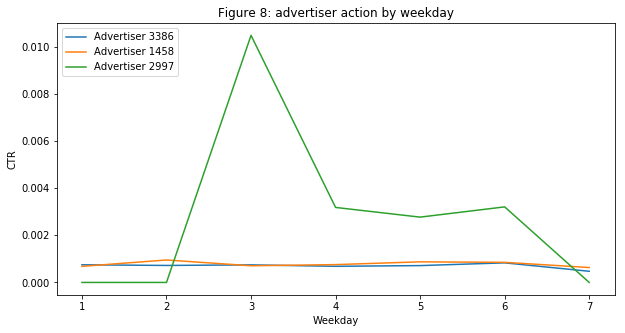

In [96]:
fig, ax = plt.subplots()

ax.plot(range(7),[ctr(a_3386[a_3386.weekday == i]) for i in range(7)], label="Advertiser 3386")
ax.plot(range(7),[ctr(a_1458[a_1458.weekday == i]) for i in range(7)], label="Advertiser 1458")
ax.plot(range(7),[ctr(a_2997[a_2997.weekday == i]) for i in range(7)], label="Advertiser 2997")
plt.title("Figure 8: advertiser action by weekday")
plt.ylabel('CTR')
plt.xlabel('Weekday')
plt.xticks(range(7),[1,2,3,4,5,6,7])
plt.legend(loc=2)
plt.show()

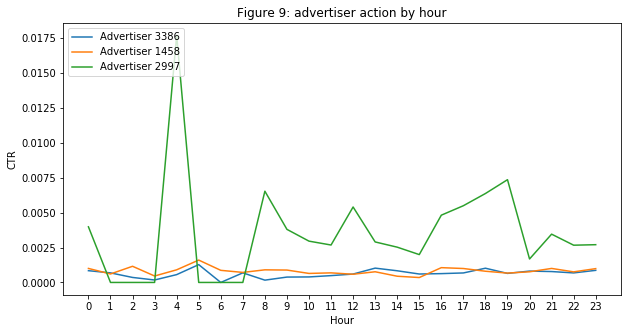

In [97]:
fig, ax = plt.subplots()

ax.plot(range(24),[ctr(a_3386[a_3386.hour == i]) for i in range(24)], label="Advertiser 3386")
ax.plot(range(24),[ctr(a_1458[a_1458.hour == i]) for i in range(24)], label="Advertiser 1458")
ax.plot(range(24),[ctr(a_2997[a_2997.hour == i]) for i in range(24)], label="Advertiser 2997")
plt.title("Figure 9: advertiser action by hour")
plt.ylabel('CTR')
plt.xlabel('Hour')
plt.xticks(range(24),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.legend(loc=2)
plt.show()

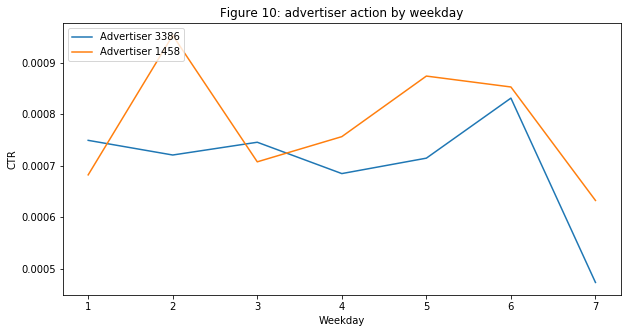

In [99]:
fig, ax = plt.subplots()

ax.plot(range(7),[ctr(a_3386[a_3386.weekday == i]) for i in range(7)], label="Advertiser 3386")
ax.plot(range(7),[ctr(a_1458[a_1458.weekday == i]) for i in range(7)], label="Advertiser 1458")
#ax.plot(range(7),[ctr(a_2997[a_2997.weekday == i]) for i in range(7)], label="Advertiser 2997")
plt.title("Figure 10: advertiser action by weekday")
plt.ylabel('CTR')
plt.xlabel('Weekday')
plt.xticks(range(7),[1,2,3,4,5,6,7])
plt.legend(loc=2)
plt.show()

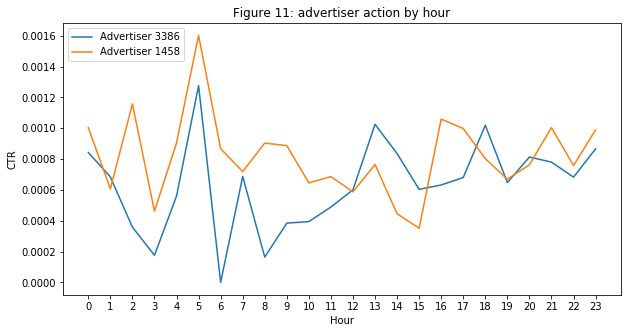

In [101]:
fig, ax = plt.subplots()

ax.plot(range(24),[ctr(a_3386[a_3386.hour == i]) for i in range(24)], label="Advertiser 3386")
ax.plot(range(24),[ctr(a_1458[a_1458.hour == i]) for i in range(24)], label="Advertiser 1458")
#ax.plot(range(24),[ctr(a_2997[a_2997.hour == i]) for i in range(24)], label="Advertiser 2997")
plt.title("Figure 11: advertiser action by hour")
plt.ylabel('CTR')
plt.xlabel('Hour')
plt.xticks(range(24),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.legend(loc=2)
plt.show()